2900 spots


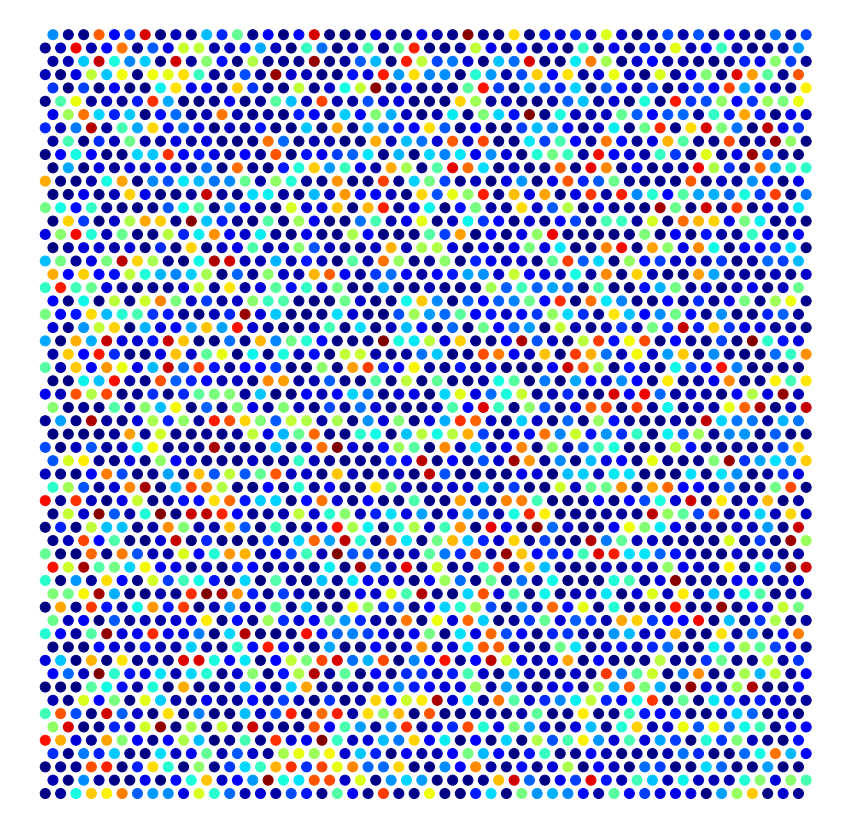

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

d = 0.02
k = d * math.sqrt(3)
x0 = np.arange(0, 1, d)
x1 = np.arange(d / 2, 1, d)
y0 = np.arange(0, 1, k)
y1 = np.arange(k / 2, 1, k)
xv0, yv0 = np.meshgrid(x0, y0, indexing='ij')
xv1, yv1 = np.meshgrid(x1, y1, indexing='ij')
print(len(xv0.flatten()) + len(xv1.flatten()), 'spots')

s = 2500 / (0.1 / d) ** 2
plt.figure(figsize=(15, 15))
# plt.scatter(xv0, yv0, s=s, c='k')
# plt.scatter(xv1, yv1, s=s, c='k')
plt.scatter(xv0, yv0, s=s, c=np.random.rand(len(xv0.flatten())) ** 3, cmap='jet')
plt.scatter(xv1, yv1, s=s, c=np.random.rand(len(xv1.flatten())) ** 3, cmap='jet')
ax = plt.gca()
ax.patch.set_alpha(1.)
plt.axis('equal')
plt.axis('off')
plt.show()

In [2]:
import scanpy as sc
import anndata as ad
import squidpy as sq

import numpy as np
import pandas as pd

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
img = sq.datasets.visium_hne_image()
adata = sq.datasets.visium_hne_adata()

ModuleNotFoundError: No module named 'scanpy'

In [3]:
import random
genes = ["Olfm1", "Plp1", "Itpka"]
for gene in genes:
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    sc.pl.spatial(adata, color=random.sample(adata.var_names.tolist(), 1), ax=ax)

NameError: name 'sc' is not defined

In [38]:
adata.X = 1.

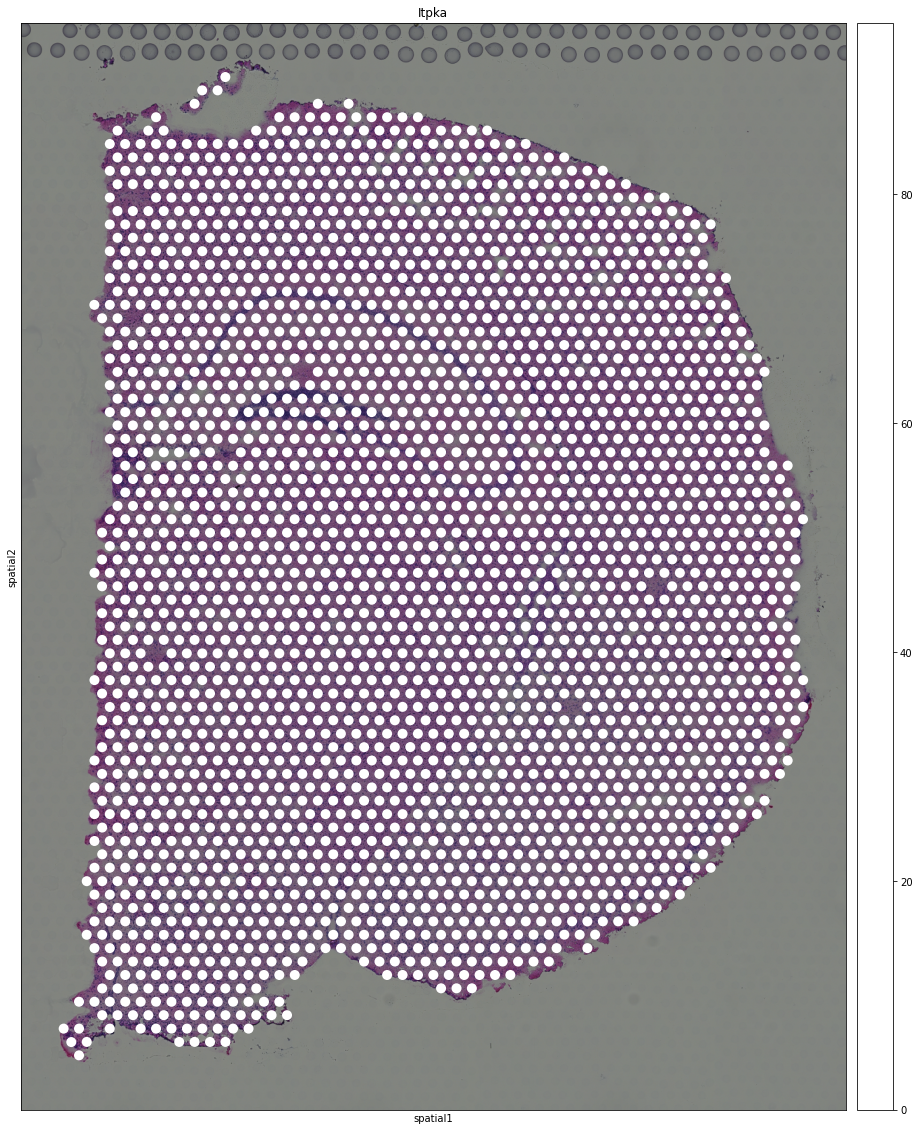

In [54]:
import matplotlib.colors
colors = [(1, 1, 1), (1, 1, 1), (1, 1, 1)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = matplotlib.colors.LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)

# Now we will use this example to illustrate 3 ways of
# handling custom colormaps.
# First, the most direct and explicit:

import pandas as pd
s = pd.Series(np.ones((len(adata),), dtype=np.int))
s.index = adata.obs.index
adata.obsm['uuu'] = s
plt.figure(figsize=(20, 20))
ax = plt.gca()
sc.pl.spatial(adata, color=gene, ax=ax, color_map=cm)

# Graphical models

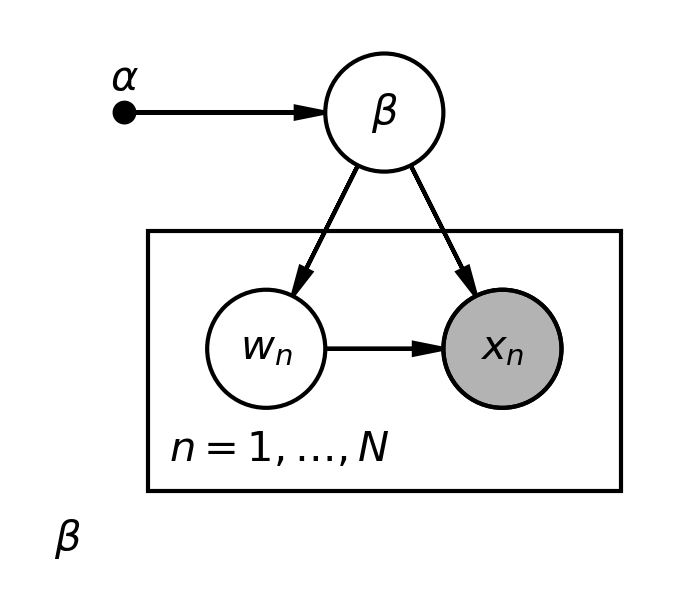

In [16]:
import daft
import matplotlib.pyplot as plt
plt.style.use('default')

pgm = daft.PGM(observed_style="shaded")

# Hierarchical parameters.
pgm.add_node("alpha", r"$\alpha$", 0.4, 2, fixed=True)
pgm.add_node("beta", r"$\beta$", 1.5, 2)

# Latent variable.
pgm.add_node("w", r"$w_n$", 1, 1)

# Data.
pgm.add_node("x", r"$x_n$", 2, 1, observed=True)

# Add in the edges.
pgm.add_edge("alpha", "beta")
pgm.add_edge("beta", "w")
pgm.add_edge("w", "x")
pgm.add_edge("beta", "x")

# And a plate.
pgm.add_plate([0.5, 0.5, 2, 1], label=r"$n = 1, \ldots, N$", shift=-0.1)

pgm.add_text(0.1, 0.1, r'$\beta$')

# Render and save.
pgm.render(dpi=300)
plt.show()

In [7]:
import inspect
print(inspect.getfullargspec(pgm.render))



FullArgSpec(args=['self', 'dpi'], varargs=None, varkw=None, defaults=(None,), kwonlyargs=[], kwonlydefaults=None, annotations={})
